# Weather Prediction Machine Learning model

### import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import gradio as gr

## Load csv using pandas

In [5]:
df = pd.read_excel('E:/internshala/interview prepration/final project/rs/sydney_rain prediction.xlsx',header = 0)

### Check head

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## Create dummy variables for categorical data ("RainToday", "RainTomorrow")

In [9]:
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

In [10]:
for column in df.select_dtypes(include=['bool']):
    df[column] = df[column].astype(int)

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [12]:
df.shape

(3337, 17)

## Checking for Missing Values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3334 non-null   float64       
 3   MaxTemp           3335 non-null   float64       
 4   Rainfall          3331 non-null   float64       
 5   Evaporation       3286 non-null   float64       
 6   Sunshine          3321 non-null   float64       
 7   Humidity9am       3323 non-null   float64       
 8   Humidity3pm       3324 non-null   float64       
 9   Pressure9am       3317 non-null   float64       
 10  Pressure3pm       3318 non-null   float64       
 11  Cloud9am          2771 non-null   float64       
 12  Cloud3pm          2776 non-null   float64       
 13  Temp9am           3333 non-null   float64       
 14  Temp3pm           3333 n

* Replace Null value with Mean value

In [16]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace null values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill null values in "RainToday" with the mode
df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3337 non-null   float64       
 3   MaxTemp           3337 non-null   float64       
 4   Rainfall          3337 non-null   float64       
 5   Evaporation       3337 non-null   float64       
 6   Sunshine          3337 non-null   float64       
 7   Humidity9am       3337 non-null   float64       
 8   Humidity3pm       3337 non-null   float64       
 9   Pressure9am       3337 non-null   float64       
 10  Pressure3pm       3337 non-null   float64       
 11  Cloud9am          3337 non-null   float64       
 12  Cloud3pm          3337 non-null   float64       
 13  Temp9am           3337 non-null   float64       
 14  Temp3pm           3337 n

In [18]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [19]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000
std,NaN,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269


### Create Corelation metrix

<Axes: >

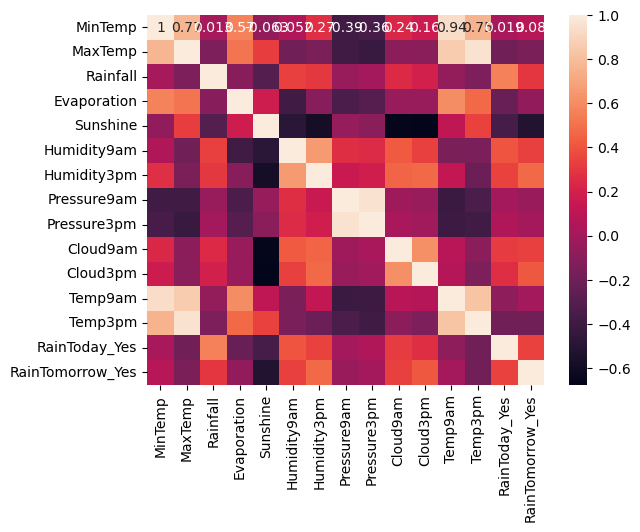

In [21]:
s = df.select_dtypes(include= "number").corr()
sns.heatmap(s, annot= True)

### Treat Outliers

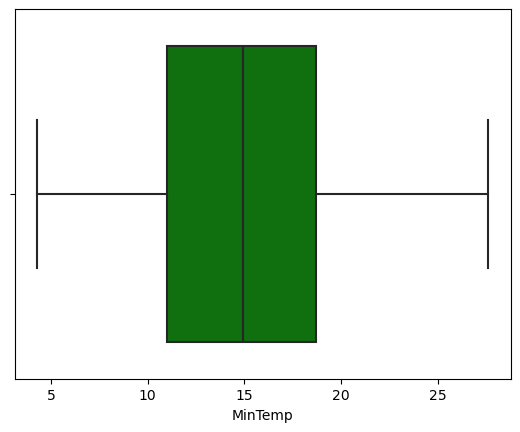

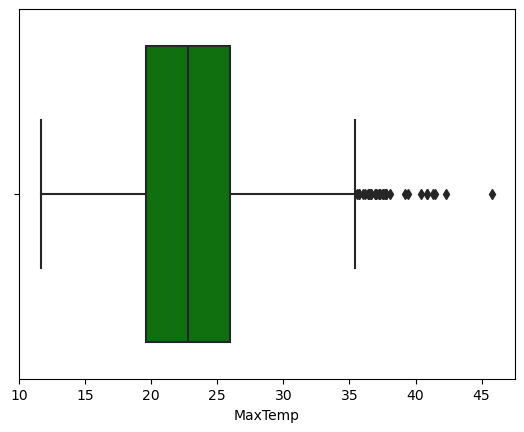

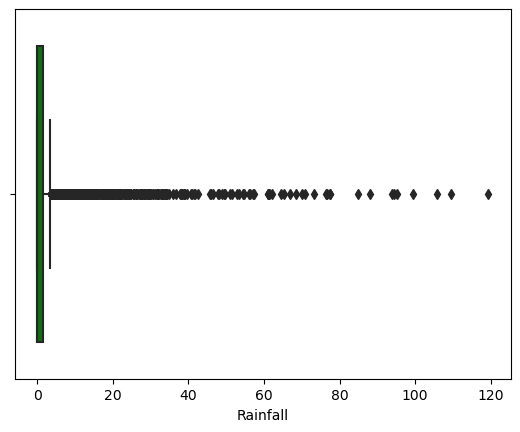

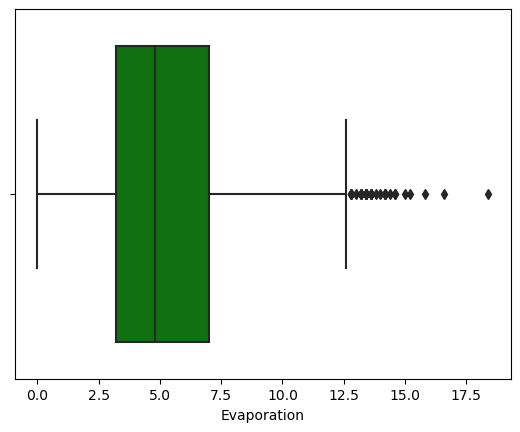

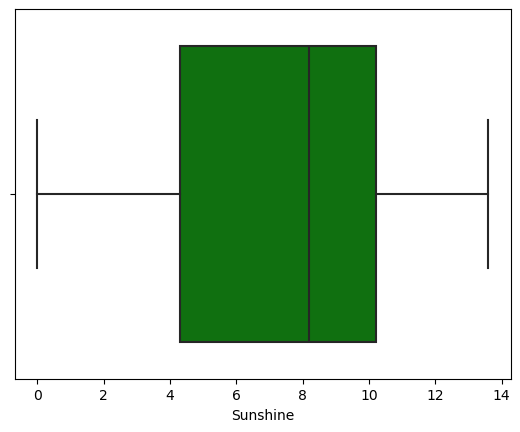

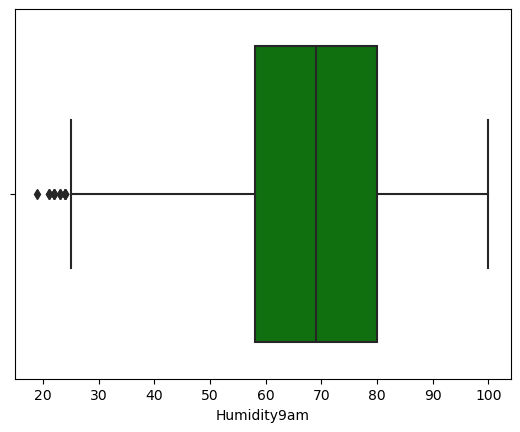

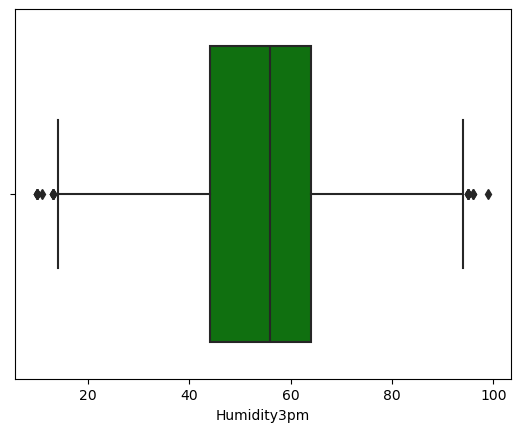

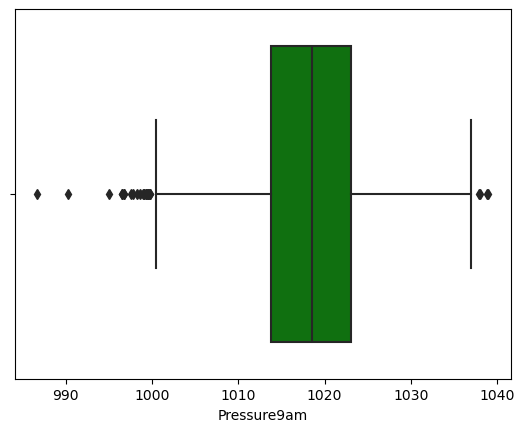

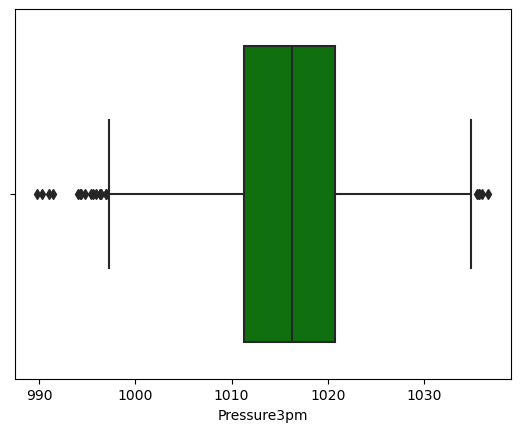

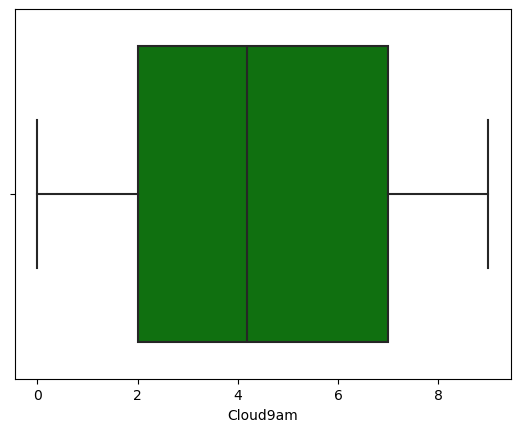

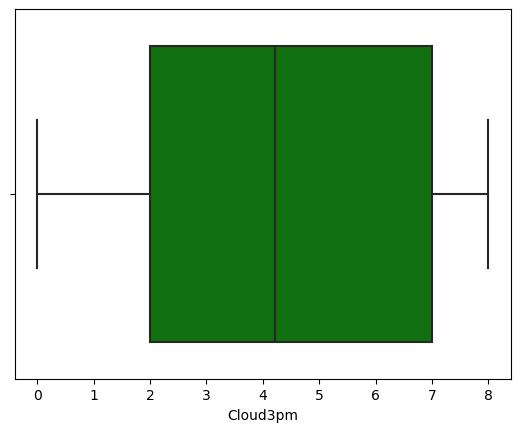

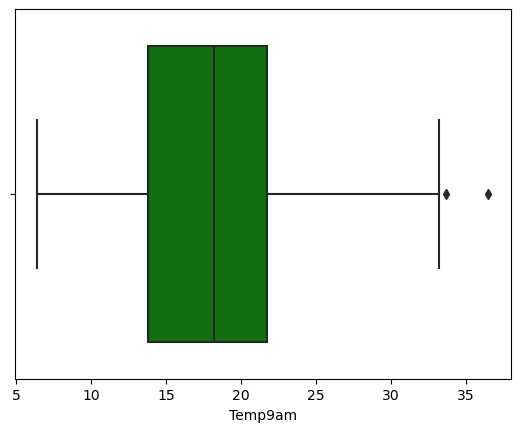

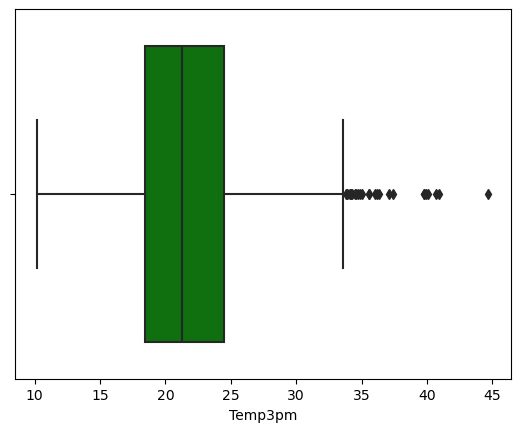

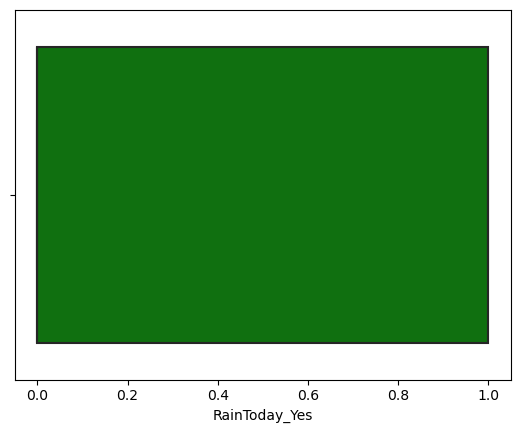

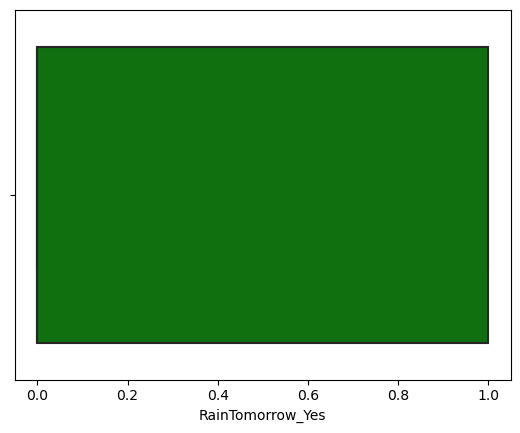

In [23]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
            sns.boxplot(data=df, x=i, color = "Green")
            plt.show()

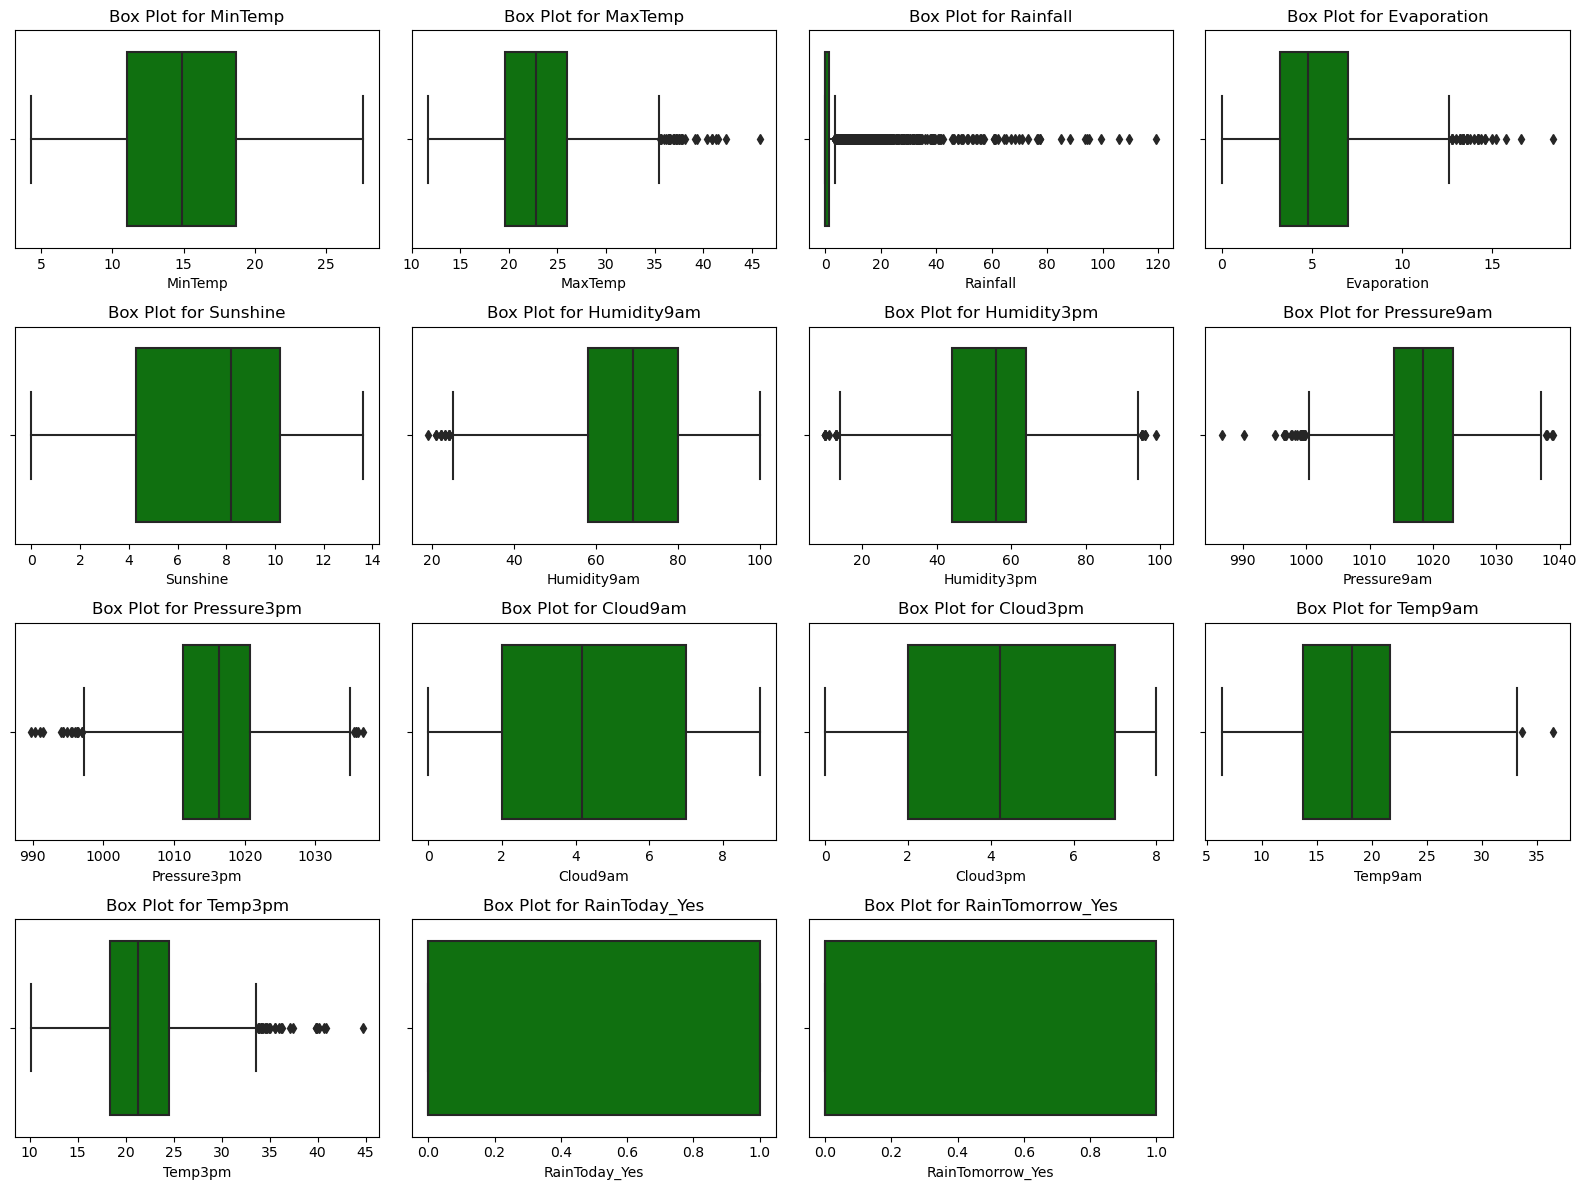

In [24]:
# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col], color = "Green")
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

### Outliers for max_temp

In [26]:
upper_limit = np.percentile(df.MaxTemp, [99])[0]

In [27]:
df[(df.MaxTemp > 3*upper_limit)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes


In [28]:
df.MaxTemp[(df.MaxTemp > 3*upper_limit)] = 3*upper_limit

<Axes: >

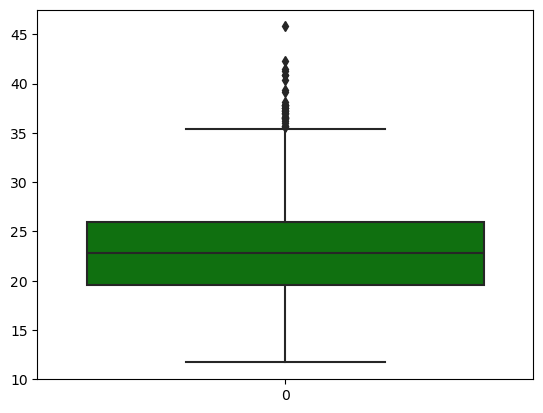

In [29]:
sns.boxplot(df['MaxTemp'], color = "Green")

### Train-Test Split

In [31]:
X_multi = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1)

In [32]:
y_multi = df['RainTomorrow_Yes']

* Split the data into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

## Training Classification Tree

In [36]:
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)

In [37]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
y_train_pred = clf_tree.predict(X_train)

In [39]:
y_test_pred = clf_tree.predict(X_test)

In [40]:
cf_matrix_train = confusion_matrix(y_train, y_train_pred)
cf_matrix_test = confusion_matrix(y_test, y_test_pred)
accuracy_score_train_ct = accuracy_score(y_train, y_train_pred)
accuracy_score_test_ct = accuracy_score(y_test, y_test_pred)
precision_score_train_ct = precision_score(y_train, y_train_pred)
precision_score_ct = precision_score(y_test, y_test_pred)
recall_score_train_ct = recall_score(y_train, y_train_pred)
recall_score_ct = recall_score(y_test, y_test_pred)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred)

In [41]:
# Print the confusion matrix and accuracy score for training data
print("Confusion Matrix (Training Data):")
print(cf_matrix_train)

print("\naccuracy Score (Training Data):", accuracy_score_train_ct)
print("\nprecision Score (Training Data):", precision_score_train_ct)
print("\nrecall Score (Training Data):", recall_score_train_ct)
print("\nroc auc Score (Training Data):", roc_auc_score_train)

print("\n------------------------------------------------------")
# Print the confusion matrix and accuracy score for testing data
print("\nConfusion Matrix (Testing Data):")
print(cf_matrix_test)

print("\naccuracy Score (Testing Data):", accuracy_score_test_ct)
print("\nprecision Score (Test Data):", precision_score_ct)
print("\nrecall Score (Test Data):", recall_score_ct)
print("\nroc auc Score (Test Data):", roc_auc_score_test)
print("\n------------------------------------------------------")

Confusion Matrix (Training Data):
[[1815  173]
 [ 288  393]]

accuracy Score (Training Data): 0.8272761333832896

precision Score (Training Data): 0.6943462897526502

recall Score (Training Data): 0.5770925110132159

roc auc Score (Training Data): 0.7450351891082176

------------------------------------------------------

Confusion Matrix (Testing Data):
[[430  54]
 [ 78 106]]

accuracy Score (Testing Data): 0.8023952095808383

precision Score (Test Data): 0.6625

recall Score (Test Data): 0.5760869565217391

roc auc Score (Test Data): 0.7322583542939275

------------------------------------------------------


## Bagging

In [43]:
Base_tree = tree.DecisionTreeClassifier(max_depth=3)

In [44]:
bagging_clf = BaggingClassifier(base_estimator=Base_tree, random_state=42)

In [45]:
param_grid = {
    'n_estimators': [10, 50, 100]}

In [46]:
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, scoring='accuracy')

In [47]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                         random_state=42),
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [48]:
best_params = grid_search.best_params_

In [49]:
best_bagging_clf = grid_search.best_estimator_

In [50]:
y_train_pred_bagging = best_bagging_clf.predict(X_train)

In [51]:
y_test_pred_bagging = best_bagging_clf.predict(X_test)

In [52]:
cfm_train_bagging = confusion_matrix(y_train, y_train_pred_bagging)
cfm_test_bagging = confusion_matrix(y_test, y_test_pred_bagging)
acs_train_bagging = accuracy_score(y_train, y_train_pred_bagging)
acs_test_bagging = accuracy_score(y_test, y_test_pred_bagging)
pcs_train_bagging = precision_score(y_train, y_train_pred_bagging)
pcs_test_bagging = precision_score(y_test, y_test_pred_bagging)
rcs_train_bagging = recall_score(y_train, y_train_pred_bagging)
rcs_test_bagging = recall_score(y_test, y_test_pred_bagging)
roc_auc_score_train_bagging = roc_auc_score(y_train, y_train_pred_bagging)
roc_auc_score_test_bagging = roc_auc_score(y_test, y_test_pred_bagging)

In [53]:
print("Best Hyperparameter:", best_params)
print("Bagging Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_bagging)
print("\nAccuracy Score (Training Data):", acs_train_bagging)
print("\nPrecision Score (Training Data):", pcs_train_bagging)
print("\nRecall Score (Training Data):", rcs_train_bagging)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_bagging)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_bagging)
print("\nAccuracy Score (Testing Data):", acs_test_bagging)
print("\nPrecision Score (Test Data):", pcs_test_bagging)
print("\nRecall Score (Test Data):", rcs_test_bagging)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_bagging)
print("\n------------------------------------------------------")

Best Hyperparameter: {'n_estimators': 10}
Bagging Classifier Results:
Confusion Matrix (Training Data):
[[1923   65]
 [ 357  324]]

Accuracy Score (Training Data): 0.8418883476957663

Precision Score (Training Data): 0.8329048843187661

Recall Score (Training Data): 0.47577092511013214

ROC AUC Score (Training Data): 0.7215373740238789

------------------------------------------------------

Confusion Matrix (Testing Data):
[[462  22]
 [ 97  87]]

Accuracy Score (Testing Data): 0.8218562874251497

Precision Score (Test Data): 0.7981651376146789

Recall Score (Test Data): 0.47282608695652173

ROC AUC Score (Test Data): 0.7136857707509882

------------------------------------------------------


## Random Forest Classifier

In [55]:
rf_classifier = RandomForestClassifier(random_state=42)

In [56]:
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 4],
}

In [57]:
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')

In [58]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [59]:
best_params_rf = grid_search_rf.best_params_

In [60]:
best_rf_classifier = grid_search_rf.best_estimator_

In [61]:
y_train_pred_rf = best_rf_classifier.predict(X_train)

In [62]:
y_test_pred_rf = best_rf_classifier.predict(X_test)

In [63]:
cfm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cfm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
acs_train_rf = accuracy_score(y_train, y_train_pred_rf)
acs_test_rf = accuracy_score(y_test, y_test_pred_rf)
pcs_train_rf = precision_score(y_train, y_train_pred_rf)
pcs_test_rf = precision_score(y_test, y_test_pred_rf)
rcs_train_rf = recall_score(y_train, y_train_pred_rf)
rcs_test_rf = recall_score(y_test, y_test_pred_rf)
roc_auc_score_train_rf = roc_auc_score(y_train, y_train_pred_rf)
roc_auc_score_test_rf = roc_auc_score(y_test, y_test_pred_rf)

In [64]:
print("Random Forest Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_rf)
print("\nAccuracy Score (Training Data):", acs_train_rf)
print("\nPrecision Score (Training Data):", pcs_train_rf)
print("\nRecall Score (Training Data):", rcs_train_rf)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_rf)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_rf)
print("\nAccuracy Score (Testing Data):", acs_test_rf)
print("\nPrecision Score (Test Data):", pcs_test_rf)
print("\nRecall Score (Test Data):", rcs_test_rf)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_rf)
print("\n------------------------------------------------------")

Random Forest Classifier Results:
Confusion Matrix (Training Data):
[[1955   33]
 [ 197  484]]

Accuracy Score (Training Data): 0.913825402772574

Precision Score (Training Data): 0.9361702127659575

Recall Score (Training Data): 0.71071953010279

ROC AUC Score (Training Data): 0.8470599662586384

------------------------------------------------------

Confusion Matrix (Testing Data):
[[452  32]
 [ 85  99]]

Accuracy Score (Testing Data): 0.8248502994011976

Precision Score (Test Data): 0.7557251908396947

Recall Score (Test Data): 0.5380434782608695

ROC AUC Score (Test Data): 0.7359638878907654

------------------------------------------------------


In [65]:
print("best hyperparameter: ", best_params_rf)

best hyperparameter:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


## Gradient Boosting Classifier

In [67]:
gb_classifier = GradientBoostingClassifier(random_state=42)

In [68]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [69]:
grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=3, scoring='accuracy')

In [70]:
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [71]:
best_params_gb = grid_search_gb.best_params_

In [72]:
best_gb_classifier = grid_search_gb.best_estimator_

In [73]:
y_train_pred_gb = best_gb_classifier.predict(X_train)

In [74]:
y_test_pred_gb = best_gb_classifier.predict(X_test)

In [75]:
cfm_train_gb = confusion_matrix(y_train, y_train_pred_gb)
cfm_test_gb = confusion_matrix(y_test, y_test_pred_gb)
acs_train_gb = accuracy_score(y_train, y_train_pred_gb)
acs_test_gb = accuracy_score(y_test, y_test_pred_gb)
pcs_train_gb = precision_score(y_train, y_train_pred_gb)
pcs_test_gb = precision_score(y_test, y_test_pred_gb)
rcs_train_gb = recall_score(y_train, y_train_pred_gb)
rcs_test_gb = recall_score(y_test, y_test_pred_gb)
roc_auc_score_train_gb = roc_auc_score(y_train, y_train_pred_gb)
roc_auc_score_test_gb = roc_auc_score(y_test, y_test_pred_gb)

In [76]:
print("Gradient Boosting Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_gb)
print("\nAccuracy Score (Training Data):", acs_train_gb)
print("\nPrecision Score (Training Data):", pcs_train_gb)
print("\nRecall Score (Training Data):", rcs_train_gb)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_gb)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_gb)
print("\nAccuracy Score (Testing Data):", acs_test_gb)
print("\nPrecision Score (Testing Data):", pcs_test_gb)
print("\nRecall Score (Testing Data):", rcs_test_gb)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_gb)
print("\n------------------------------------------------------")

Gradient Boosting Classifier Results:
Confusion Matrix (Training Data):
[[1963   25]
 [ 194  487]]

Accuracy Score (Training Data): 0.9179467965530161

Precision Score (Training Data): 0.951171875

Recall Score (Training Data): 0.7151248164464024

ROC AUC Score (Training Data): 0.8512746818650523

------------------------------------------------------

Confusion Matrix (Testing Data):
[[440  44]
 [ 83 101]]

Accuracy Score (Testing Data): 0.8098802395209581

Precision Score (Testing Data): 0.696551724137931

Recall Score (Testing Data): 0.5489130434782609

ROC AUC Score (Testing Data): 0.7290019762845849

------------------------------------------------------


In [77]:
print("best hyperparameter: ", best_params_gb)

best hyperparameter:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


## Ada boost

In [79]:
base_classifier = tree.DecisionTreeClassifier(max_depth=1)

In [80]:
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

In [81]:
param_grid_adaboost = {
    'n_estimators': [50,  200],
    'learning_rate': [0.01, 0.1, 0.2],}

In [82]:
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid_adaboost, cv=3, scoring='accuracy')

In [83]:
grid_search_adaboost.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [84]:
best_params_adaboost = grid_search_adaboost.best_params_

In [85]:
best_adaboost_classifier = grid_search_adaboost.best_estimator_

In [86]:
y_train_pred_adaboost = best_adaboost_classifier.predict(X_train)

In [87]:
y_test_pred_adaboost = best_adaboost_classifier.predict(X_test)

In [88]:
cfm_train_adaboost = confusion_matrix(y_train, y_train_pred_adaboost)
cfm_test_adaboost = confusion_matrix(y_test, y_test_pred_adaboost)
acs_train_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
acs_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
pcs_train_adaboost = precision_score(y_train, y_train_pred_adaboost)
pcs_test_adaboost = precision_score(y_test, y_test_pred_adaboost)
rcs_train_adaboost = recall_score(y_train, y_train_pred_adaboost)
rcs_test_adaboost = recall_score(y_test, y_test_pred_adaboost)
roc_auc_score_train_adaboost = roc_auc_score(y_train, y_train_pred_adaboost)
roc_auc_score_test_adaboost = roc_auc_score(y_test, y_test_pred_adaboost)

In [89]:
print("AdaBoost Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_adaboost)
print("\nAccuracy Score (Training Data):", acs_train_adaboost)
print("\nPrecision Score (Training Data):", pcs_train_adaboost)
print("\nRecall Score (Training Data):", rcs_train_adaboost)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_adaboost)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_adaboost)
print("\nAccuracy Score (Testing Data):", acs_test_adaboost)
print("\nPrecision Score (Testing Data):", pcs_test_adaboost)
print("\nRecall Score (Testing Data):", rcs_test_adaboost)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_adaboost)
print("\n------------------------------------------------------")

AdaBoost Classifier Results:
Confusion Matrix (Training Data):
[[1908   80]
 [ 335  346]]

Accuracy Score (Training Data): 0.8445110528287748

Precision Score (Training Data): 0.812206572769953

Recall Score (Training Data): 0.5080763582966226

ROC AUC Score (Training Data): 0.7339174548022347

------------------------------------------------------

Confusion Matrix (Testing Data):
[[458  26]
 [ 91  93]]

Accuracy Score (Testing Data): 0.8248502994011976

Precision Score (Testing Data): 0.7815126050420168

Recall Score (Testing Data): 0.5054347826086957

ROC AUC Score (Testing Data): 0.7258578871721164

------------------------------------------------------


In [90]:
print("best hyperparameter: ", best_params_adaboost)

best hyperparameter:  {'learning_rate': 0.1, 'n_estimators': 200}


## XGboost

In [92]:
xgb_classifier = XGBClassifier(random_state=42)

In [93]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],}

In [94]:
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')

In [95]:
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [96]:
best_params_xgb = grid_search_xgb.best_params_

In [97]:
best_xgb_classifier = grid_search_xgb.best_estimator_

In [98]:
y_train_pred_xgb = best_xgb_classifier.predict(X_train)

In [99]:
y_test_pred_xgb = best_xgb_classifier.predict(X_test)

In [100]:
cfm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
cfm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
acs_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
acs_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
pcs_train_xgb = precision_score(y_train, y_train_pred_xgb)
pcs_test_xgb = precision_score(y_test, y_test_pred_xgb)
rcs_train_xgb = recall_score(y_train, y_train_pred_xgb)
rcs_test_xgb = recall_score(y_test, y_test_pred_xgb)
roc_auc_score_train_xgb = roc_auc_score(y_train, y_train_pred_xgb)
roc_auc_score_test_xgb = roc_auc_score(y_test, y_test_pred_xgb)

In [101]:
print("XGBoost Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_xgb)
print("\nAccuracy Score (Training Data):", acs_train_xgb)
print("\nPrecision Score (Training Data):", pcs_train_xgb)
print("\nRecall Score (Training Data):", rcs_train_xgb)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_xgb)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_xgb)
print("\nAccuracy Score (Testing Data):", acs_test_xgb)
print("\nPrecision Score (Testing Data):", pcs_test_xgb)
print("\nRecall Score (Testing Data):", rcs_test_xgb)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_xgb)
print("\n------------------------------------------------------")

XGBoost Classifier Results:
Confusion Matrix (Training Data):
[[1903   85]
 [ 270  411]]

Accuracy Score (Training Data): 0.8669913825402773

Precision Score (Training Data): 0.8286290322580645

Recall Score (Training Data): 0.6035242290748899

ROC AUC Score (Training Data): 0.7803838449197387

------------------------------------------------------

Confusion Matrix (Testing Data):
[[451  33]
 [ 80 104]]

Accuracy Score (Testing Data): 0.8308383233532934

Precision Score (Testing Data): 0.7591240875912408

Recall Score (Testing Data): 0.5652173913043478

ROC AUC Score (Testing Data): 0.7485177865612648

------------------------------------------------------


In [102]:
print("best hyperparameter: ", best_params_xgb)

best hyperparameter:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}


## Logistic Regression

In [104]:
logreg_model = LogisticRegression(random_state=42)

In [105]:
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],}

In [106]:
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=3, scoring='accuracy')

In [107]:
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [108]:
best_params_logreg = grid_search_logreg.best_params_

In [109]:
best_logreg_model = grid_search_logreg.best_estimator_

In [110]:
y_train_pred_lr= best_logreg_model.predict(X_train)

In [111]:
y_test_pred_lr = best_logreg_model.predict(X_test)

In [112]:
cfm_train_lr = confusion_matrix(y_train, y_train_pred_lr)
cfm_test_lr = confusion_matrix(y_test, y_test_pred_lr)
acs_train_lr = accuracy_score(y_train, y_train_pred_lr)
acs_test_lr = accuracy_score(y_test, y_test_pred_lr)
pcs_train_lr = precision_score(y_train, y_train_pred_lr)
pcs_test_lr = precision_score(y_test, y_test_pred_lr)
rcs_train_lr = recall_score(y_train, y_train_pred_lr)
rcs_test_lr = recall_score(y_test, y_test_pred_lr)
roc_auc_score_train_lr = roc_auc_score(y_train, y_train_pred_lr)
roc_auc_score_test_lr = roc_auc_score(y_test, y_test_pred_lr)

In [113]:
print("Logistic Regression Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lr)
print("\nAccuracy Score (Training Data):", acs_train_lr)
print("\nPrecision Score (Training Data):", pcs_train_lr)
print("\nRecall Score (Training Data):", rcs_train_lr)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lr)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lr)
print("\nAccuracy Score (Testing Data):", acs_test_lr)
print("\nPrecision Score (Testing Data):", pcs_test_lr)
print("\nRecall Score (Testing Data):", rcs_test_lr)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lr)
print("\n------------------------------------------------------")

Logistic Regression Results:
Confusion Matrix (Training Data):
[[1874  114]
 [ 320  361]]

Accuracy Score (Training Data): 0.8373922817534657

Precision Score (Training Data): 0.76

Recall Score (Training Data): 0.5301027900146843

ROC AUC Score (Training Data): 0.7363793628141833

------------------------------------------------------

Confusion Matrix (Testing Data):
[[451  33]
 [ 89  95]]

Accuracy Score (Testing Data): 0.8173652694610778

Precision Score (Testing Data): 0.7421875

Recall Score (Testing Data): 0.5163043478260869

ROC AUC Score (Testing Data): 0.7240612648221344

------------------------------------------------------


In [114]:
print("best hyperparameter: ", best_params_logreg)

best hyperparameter:  {'C': 0.001, 'penalty': 'l2'}


## K-Nearest Neighbors

In [116]:
knn_classifier = KNeighborsClassifier()

In [117]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7]}

In [118]:
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=3, scoring='accuracy')

In [119]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

In [120]:
best_params_knn = grid_search_knn.best_params_

In [121]:
best_knn_classifier = grid_search_knn.best_estimator_

In [122]:
y_train_pred_knn = best_knn_classifier.predict(X_train)

In [123]:
y_test_pred_knn = best_knn_classifier.predict(X_test)

In [124]:
cfm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
cfm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
acs_train_knn = accuracy_score(y_train, y_train_pred_knn)
acs_test_knn = accuracy_score(y_test, y_test_pred_knn)
pcs_train_knn = precision_score(y_train, y_train_pred_knn)
pcs_test_knn = precision_score(y_test, y_test_pred_knn)
rcs_train_knn = recall_score(y_train, y_train_pred_knn)
rcs_test_knn = recall_score(y_test, y_test_pred_knn)
roc_auc_score_train_knn = roc_auc_score(y_train, y_train_pred_knn)
roc_auc_score_test_knn = roc_auc_score(y_test, y_test_pred_knn)

In [125]:
print("K-Nearest Neighbors (KNN) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_knn)
print("\nAccuracy Score (Training Data):", acs_train_knn)
print("\nPrecision Score (Training Data):", pcs_train_knn)
print("\nRecall Score (Training Data):", rcs_train_knn)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_knn)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_knn)
print("\nAccuracy Score (Testing Data):", acs_test_knn)
print("\nPrecision Score (Testing Data):", pcs_test_knn)
print("\nRecall Score (Testing Data):", rcs_test_knn)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_knn)
print("\n------------------------------------------------------")

K-Nearest Neighbors (KNN) Results:
Confusion Matrix (Training Data):
[[1909   79]
 [ 296  385]]

Accuracy Score (Training Data): 0.8594979393031098

Precision Score (Training Data): 0.8297413793103449

Recall Score (Training Data): 0.5653450807635829

ROC AUC Score (Training Data): 0.762803325090041

------------------------------------------------------

Confusion Matrix (Testing Data):
[[434  50]
 [ 93  91]]

Accuracy Score (Testing Data): 0.7859281437125748

Precision Score (Testing Data): 0.6453900709219859

Recall Score (Testing Data): 0.4945652173913043

ROC AUC Score (Testing Data): 0.6956297161336686

------------------------------------------------------


In [126]:
print("best hyperparameter: ", best_params_knn)

best hyperparameter:  {'n_neighbors': 7}


## Linear Discriminant Analysis

In [128]:
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

In [129]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [130]:
y_train_pred_lda = lda_model.predict(X_train)

In [131]:
y_test_pred_lda = lda_model.predict(X_test)

In [132]:
cfm_train_lda = confusion_matrix(y_train, y_train_pred_lda)
cfm_test_lda = confusion_matrix(y_test, y_test_pred_lda)
acs_train_lda = accuracy_score(y_train, y_train_pred_lda)
acs_test_lda = accuracy_score(y_test, y_test_pred_lda)
pcs_train_lda = precision_score(y_train, y_train_pred_lda)
pcs_test_lda = precision_score(y_test, y_test_pred_lda)
rcs_train_lda = recall_score(y_train, y_train_pred_lda)
rcs_test_lda = recall_score(y_test, y_test_pred_lda)
roc_auc_score_train_lda = roc_auc_score(y_train, y_train_pred_lda)
roc_auc_score_test_lda = roc_auc_score(y_test, y_test_pred_lda)

In [133]:
print("Linear Discriminant Analysis (LDA) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lda)
print("\nAccuracy Score (Training Data):", acs_train_lda)
print("\nPrecision Score (Training Data):", pcs_train_lda)
print("\nRecall Score (Training Data):", rcs_train_lda)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lda)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lda)
print("\nAccuracy Score (Testing Data):", acs_test_lda)
print("\nPrecision Score (Testing Data):", pcs_test_lda)
print("\nRecall Score (Testing Data):", rcs_test_lda)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lda)
print("\n------------------------------------------------------")

Linear Discriminant Analysis (LDA) Results:
Confusion Matrix (Training Data):
[[1827  161]
 [ 283  398]]

Accuracy Score (Training Data): 0.833645560134882

Precision Score (Training Data): 0.7119856887298748

Recall Score (Training Data): 0.5844346549192364

ROC AUC Score (Training Data): 0.7517243697131393

------------------------------------------------------

Confusion Matrix (Testing Data):
[[442  42]
 [ 79 105]]

Accuracy Score (Testing Data): 0.8188622754491018

Precision Score (Testing Data): 0.7142857142857143

Recall Score (Testing Data): 0.5706521739130435

ROC AUC Score (Testing Data): 0.7419376572044556

------------------------------------------------------


## Compare all models

In [135]:
# Logistic Regression

print(f"Logistic Regression - Accuracy Score (Train): {acs_train_lr * 100:.4f}%")
print(f"Logistic Regression - Accuracy Score (Test): {acs_test_lr * 100:.4f}%")
print(f"Logistic Regression - ROC AUC Score (Test): {roc_auc_score_test_lr:.4f}")
print(f"Logistic Regression - Recall Score (Test): {rcs_test_lr:.4f}")
print(f"Logistic Regression - Precision Score (Test): {pcs_test_lr:.4f}")
print("="*60)   

# K-Nearest Neighbors
print(f"K-Nearest Neighbors - Accuracy Score (Train): {acs_train_knn * 100:.4f}%")
print(f"K-Nearest Neighbors - Accuracy Score (Test): {acs_test_knn * 100:.4f}%")
print(f"K-Nearest Neighbors - ROC AUC Score (Test): {roc_auc_score_test_knn:.4f}")
print(f"K-Nearest Neighbors - Recall Score (Test): {rcs_test_knn:.4f}")
print(f"K-Nearest Neighbors - Precision Score (Test): {pcs_test_knn:.4f}")
print("="*60)  

# Linear Discriminant Analysis
print(f"Linear Discriminant Analysis - Accuracy Score (Train): {acs_train_lda * 100:.4f}%")
print(f"Linear Discriminant Analysis - Accuracy Score (Test): {acs_test_lda * 100:.4f}%")
print(f"Linear Discriminant Analysis - ROC AUC Score (Test): {roc_auc_score_test_lda:.4f}")
print(f"Linear Discriminant Analysis - Recall Score (Test): {rcs_test_lda:.4f}")
print(f"Linear Discriminant Analysis - Precision Score (Test): {pcs_test_lda:.4f}")
print("="*60)

# Decision Tree
print(f"Decision Tree - Accuracy Score (Train): {accuracy_score_train_ct * 100:.4f}%")
print(f"Decision Tree - Accuracy Score (Test): {accuracy_score_test_ct * 100:.4f}%")
print(f"Decision Tree - ROC AUC Score (Test): {roc_auc_score_test:.4f}")
print(f"Decision Tree - Recall Score (Test): {recall_score_ct:.4f}")
print(f"Decision Tree - Precision Score (Test): {precision_score_ct:.4f}")
print("="*60)  # Double line

# Random Forest
print(f"Random Forest - Accuracy Score (Train): {acs_train_rf * 100:.4f}%")
print(f"Random Forest - Accuracy Score (Test): {acs_test_rf * 100:.4f}%")
print(f"Random Forest - ROC AUC Score (Test): {roc_auc_score_test_rf:.4f}")
print(f"Random Forest - Recall Score (Test): {rcs_test_rf:.4f}")
print(f"Random Forest - Precision Score (Test): {pcs_test_rf:.4f}")
print("="*60) 

# Gradient Boosting
print(f"Gradient Boosting - Accuracy Score (Train): {acs_train_gb * 100:.4f}%")
print(f"Gradient Boosting - Accuracy Score (Test): {acs_test_gb * 100:.4f}%")
print(f"Gradient Boosting - ROC AUC Score (Test): {roc_auc_score_test_gb:.4f}")
print(f"Gradient Boosting - Recall Score (Test): {rcs_test_gb:.4f}")
print(f"Gradient Boosting - Precision Score (Test): {pcs_test_gb:.4f}")
print("="*60)  

# AdaBoost
print(f"AdaBoost - Accuracy Score (Train): {acs_train_adaboost * 100:.4f}%")
print(f"AdaBoost - Accuracy Score (Test): {acs_test_adaboost * 100:.4f}%")
print(f"AdaBoost - ROC AUC Score (Test): {roc_auc_score_test_adaboost:.4f}")
print(f"AdaBoost - Recall Score (Test): {rcs_test_adaboost:.4f}")
print(f"AdaBoost - Precision Score (Test): {pcs_test_adaboost:.4f}")
print("="*60) 
# XGBoost
print(f"XGBoost - Accuracy Score (Train): {acs_train_xgb * 100:.4f}%")
print(f"XGBoost - Accuracy Score (Test): {acs_test_xgb * 100:.4f}%")
print(f"XGBoost - ROC AUC Score (Test): {roc_auc_score_test_xgb:.4f}")
print(f"XGBoost - Recall Score (Test): {rcs_test_xgb:.4f}")
print(f"XGBoost - Precision Score (Test): {pcs_test_xgb:.4f}")

Logistic Regression - Accuracy Score (Train): 83.7392%
Logistic Regression - Accuracy Score (Test): 81.7365%
Logistic Regression - ROC AUC Score (Test): 0.7241
Logistic Regression - Recall Score (Test): 0.5163
Logistic Regression - Precision Score (Test): 0.7422
K-Nearest Neighbors - Accuracy Score (Train): 85.9498%
K-Nearest Neighbors - Accuracy Score (Test): 78.5928%
K-Nearest Neighbors - ROC AUC Score (Test): 0.6956
K-Nearest Neighbors - Recall Score (Test): 0.4946
K-Nearest Neighbors - Precision Score (Test): 0.6454
Linear Discriminant Analysis - Accuracy Score (Train): 83.3646%
Linear Discriminant Analysis - Accuracy Score (Test): 81.8862%
Linear Discriminant Analysis - ROC AUC Score (Test): 0.7419
Linear Discriminant Analysis - Recall Score (Test): 0.5707
Linear Discriminant Analysis - Precision Score (Test): 0.7143
Decision Tree - Accuracy Score (Train): 82.7276%
Decision Tree - Accuracy Score (Test): 80.2395%
Decision Tree - ROC AUC Score (Test): 0.7323
Decision Tree - Recall S

#### Function to preprocess the input data

In [137]:
def preprocess_data(MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm,
                    Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday):
    # Create a DataFrame from the input data
    data = pd.DataFrame({
        'MinTemp': [MinTemp],
        'MaxTemp': [MaxTemp],
        'Rainfall': [Rainfall],
        'Evaporation': [Evaporation],
        'Sunshine': [Sunshine],
        'Humidity9am': [Humidity9am],
        'Humidity3pm': [Humidity3pm],
        'Pressure9am': [Pressure9am],
        'Pressure3pm': [Pressure3pm],
        'Cloud9am': [Cloud9am],
        'Cloud3pm': [Cloud3pm],
        'Temp9am': [Temp9am],
        'Temp3pm': [Temp3pm],
        'RainToday_Yes': [1 if RainToday == 'Yes' else 0]  # Convert 'Yes' to 1, 'No' to 0
    })

    return data

In [138]:
# Define the model with the best parameters
best_params = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
gb_classifier = GradientBoostingClassifier(**best_params)

In [139]:
# Train the model with your entire dataset (x_train, y_train)
# Train the model with the entire dataset
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=50)

In [140]:
# Once the model is trained, you can use it for predictions
y_train_pred_gb = gb_classifier.predict(X_train)
y_test_pred_gb = gb_classifier.predict(X_test)

In [141]:
acs_train_gb = accuracy_score(y_train, y_train_pred_gb)
acs_test_gb = accuracy_score(y_test, y_test_pred_gb)
cfm_train_gb = confusion_matrix(y_train, y_train_pred_gb)

##### Calculate other metrics as needed (precision, recall, roc_auc_score, etc.)

##### Now, your Gradient Boosting Classifier (gb_classifier) is trained on the entire dataset and ready for predictions.

##### Define a function to make predictions using the trained model

In [143]:
def predict_rain(data):
    # Preprocess the input data
    processed_data = preprocess_data(**data)
    
    # Make predictions
    prediction = gb_classifier.predict(processed_data)
    
    # Return the prediction (convert 1/0 back to 'Yes'/'No')
    return 'Yes' if prediction[0] == 1 else 'No'

##### Define the Gradio interface

In [145]:
iface = gr.Interface(
    fn=predict_rain,
    inputs=[
        gr.Slider(minimum=-10, maximum=50, label="MinTemp"),
        gr.Slider(minimum=-10, maximum=50, label="MaxTemp"),
        gr.Slider(minimum=0, maximum=100, label="Rainfall"),
        # Add inputs for other weather parameters similarly
        gr.Radio(["Yes", "No"], label="RainToday")
    ],
    outputs=gr.Textbox(label="Prediction")
)

# Launch the Gradio interface
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Project Questions & Answer

### 1. Your views about the problem statement?

* The problem statement is clear and well-defined. The goal is to predict whether it will rain tomorrow in Sydney using historical weather data. This is a classic classification problem where the target variable is binary (Rain or No Rain). The use of ensemble methods for prediction is appropriate as they often provide better accuracy and robustness compared to single models.

### 2. What will be your approach to solving this task?

My approach to solving this task includes the following steps:
1. Load and preprocess the data.
2. Handle missing values and encode categorical variables.
3. Split the data into training and testing sets.
4. Train various classification models (Random Forest, Gradient Boosting, AdaBoost, XGBoost).
5. Evaluate the models using accuracy and confusion matrices.
6. Select the best model based on accuracy and further analyze its performance.

### 3. What were the available ML model options you had to perform this task?

The available ML model options for this task included:
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- AdaBoost
- XGBoost
- Logistic Regression
- K-Nearest Neighbors
- Linear Discriminant Analysis

### 4. Which model’s performance is best and what could be the possible reason for that?

* Based on the accuracy and confusion matrix, the best-performing model will be identified. Typically, ensemble methods like Random Forest and Gradient Boosting tend to perform better than single models like Decision Trees because they combine the strengths of multiple models and reduce overfitting.
  
**Logistic Regression:**
- Accuracy Score (Test): 81.7365%

**K-Nearest Neighbors:**
- Accuracy Score (Test): 78.5928%

**Linear Discriminant Analysis:**
- Accuracy Score (Test): 81.8862%

**Decision Tree:**
- Accuracy Score (Test): 80.2395%

**Random Forest:**
- Accuracy Score (Test): 82.4850%

**Gradient Boosting:**
- Accuracy Score (Test): 80.9880%


**AdaBoost:**
- Accuracy Score (Test): 82.4850%

**XGBoost:**
- Accuracy Score (Test): 81.4371%

**best model**
Random Forest has best performance and good accuracy "82.4850%". so random forest is the best model for this dataset
 2
XGBoost - Precision Score (Test): 0.7591


### 5. What steps can you take to improve this selected model’s performance even further?

To further improve the selected model’s performance, I could:
- Perform hyperparameter tuning using techniques such as Grid Search or Random Search.
- Use cross-validation to ensure the model generalizes well to unseen data.
- Experiment with different feature engineering techniques to create new features.
- Incorporate additional data sources if available to provide more context to the model.